<a href="https://colab.research.google.com/github/taerd/DSIntro/blob/master/Titanic_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
titanic_data=pd.read_csv('https://stepik.org/media/attachments/course/4852/titanic.csv')

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# нахождение пропущеных значений
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# выбираем данные для обучения (axis=1 по столбцам)
X=titanic_data.drop(['PassengerId','Survived','Name','Ticket','Cabin'],axis=1)
y=titanic_data.Survived

In [ ]:
# избежание номинативных переменных (One-hot encoding)
X = pd.get_dummies(X)

In [ ]:
# Заполнение пропущенных значений в поле age медианным значением возраста
X=X.fillna({'Age' : X.Age.median()})

In [ ]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [ ]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [ ]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
clf=tree.DecisionTreeClassifier(criterion='entropy')

In [ ]:
clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
# параметры дерева
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
# список атрибутов дерева
dir(clf)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_prune_tree',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_X_predict',
 '_validate_data',
 'apply',
 'ccp_alpha',
 'class_weight',
 'classes_',
 'cost_complexity_pruning_path',
 'criterion',
 'decision_path',
 'feature_importances_',
 'fit',
 'get_depth',
 'get_n_leaves',
 'get_params',
 'max_depth',
 'max_features',
 'max_features_',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_impurity_split',
 'min_samples_leaf',
 'min_sample

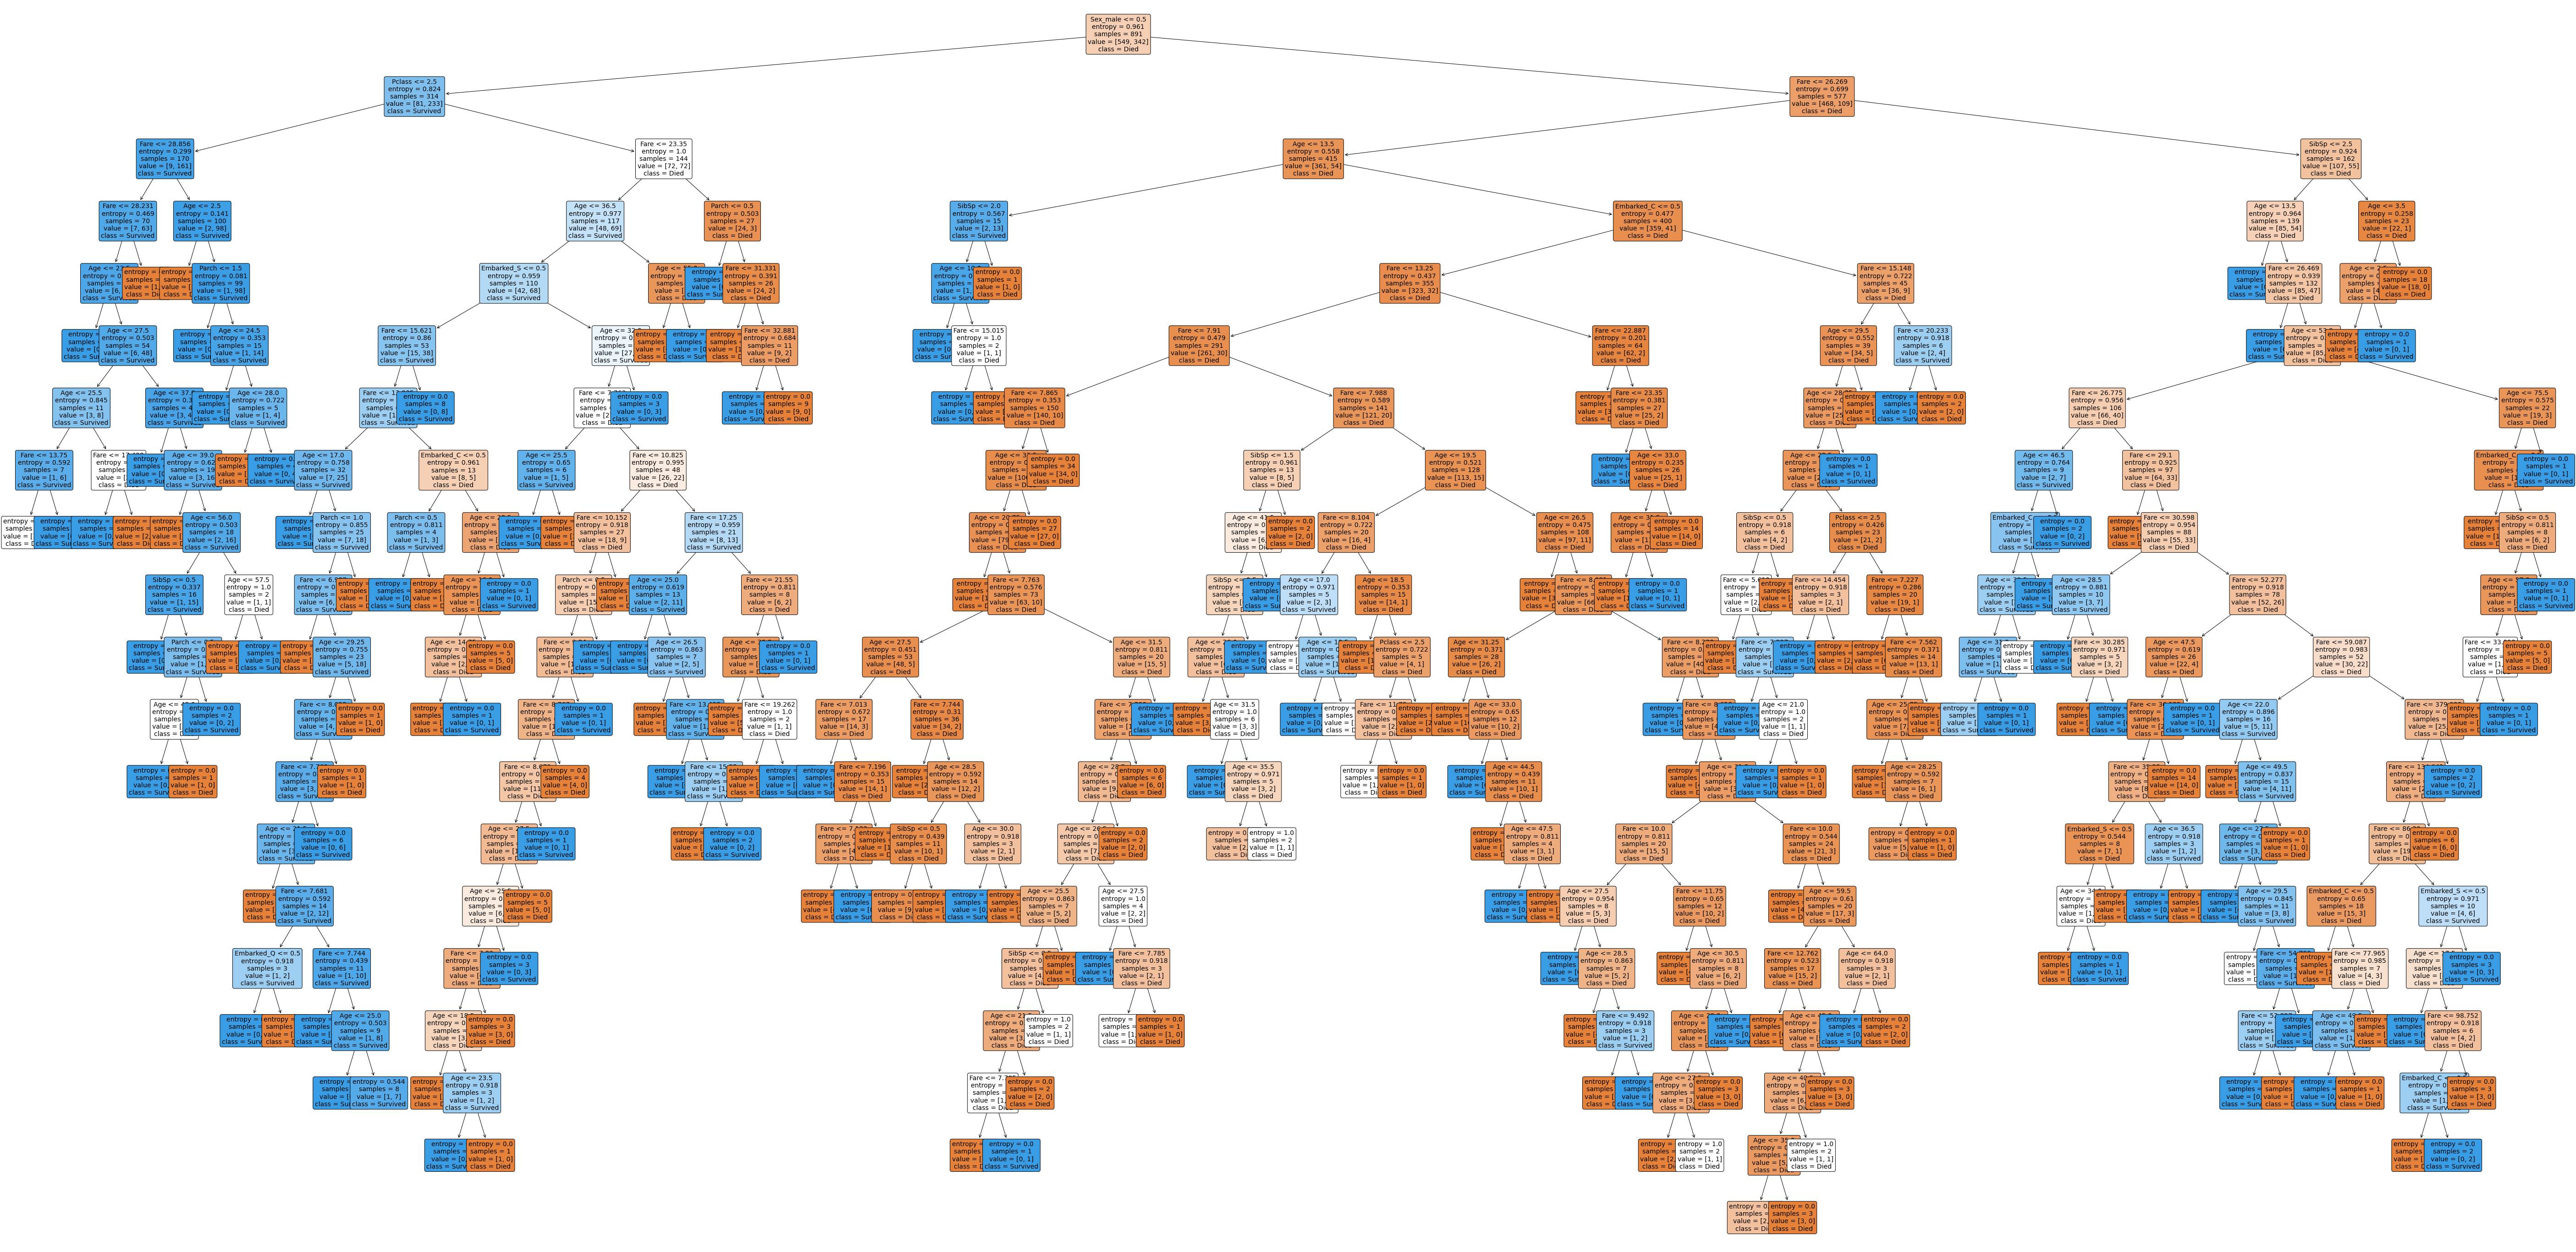

In [ ]:
#on pycharm
plt.figure(figsize=(100, 50))
tree.plot_tree(clf, 
               feature_names=list(X), 
               class_names=['Died', 'Survived'], 
               filled=True,
               rounded=True,
               fontsize = 14)
plt.show()

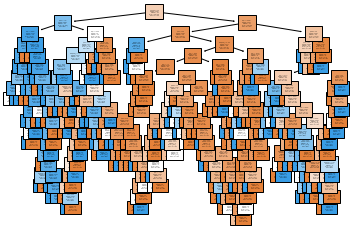

In [ ]:
tree.plot_tree(clf,feature_names=list(X),class_names=['Survived','Died'],filled=True,fontsize=1);

In [ ]:
# Подбор параметров за счет тестирования модели на другой выборке(неверное суждение)
# Разбитие нашей выборки на тестовую и train части
from sklearn.model_selection import train_test_split

In [ ]:
# 33 процента из всей выборки будет 'тестом'
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.33, random_state = 42)

In [ ]:
X_train.shape

(596, 10)

In [ ]:
X_test.shape

(295, 10)

In [ ]:
# Валидация (очень упрощенная версия)
# Сравнение предсказанных ответов на train и на test
clf.score(X,y)

0.9797979797979798

In [ ]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
clf.score(X_train,y_train)

0.9798657718120806

In [ ]:
clf.score(X_test,y_test)

0.7694915254237288

In [ ]:
# процент упал, изза переобучения на конкретной выборке
# подгон параметра max_depth
clf=tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [ ]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
clf.score(X_train,y_train)

0.8238255033557047

In [ ]:
clf.score(X_test,y_test)

0.8203389830508474

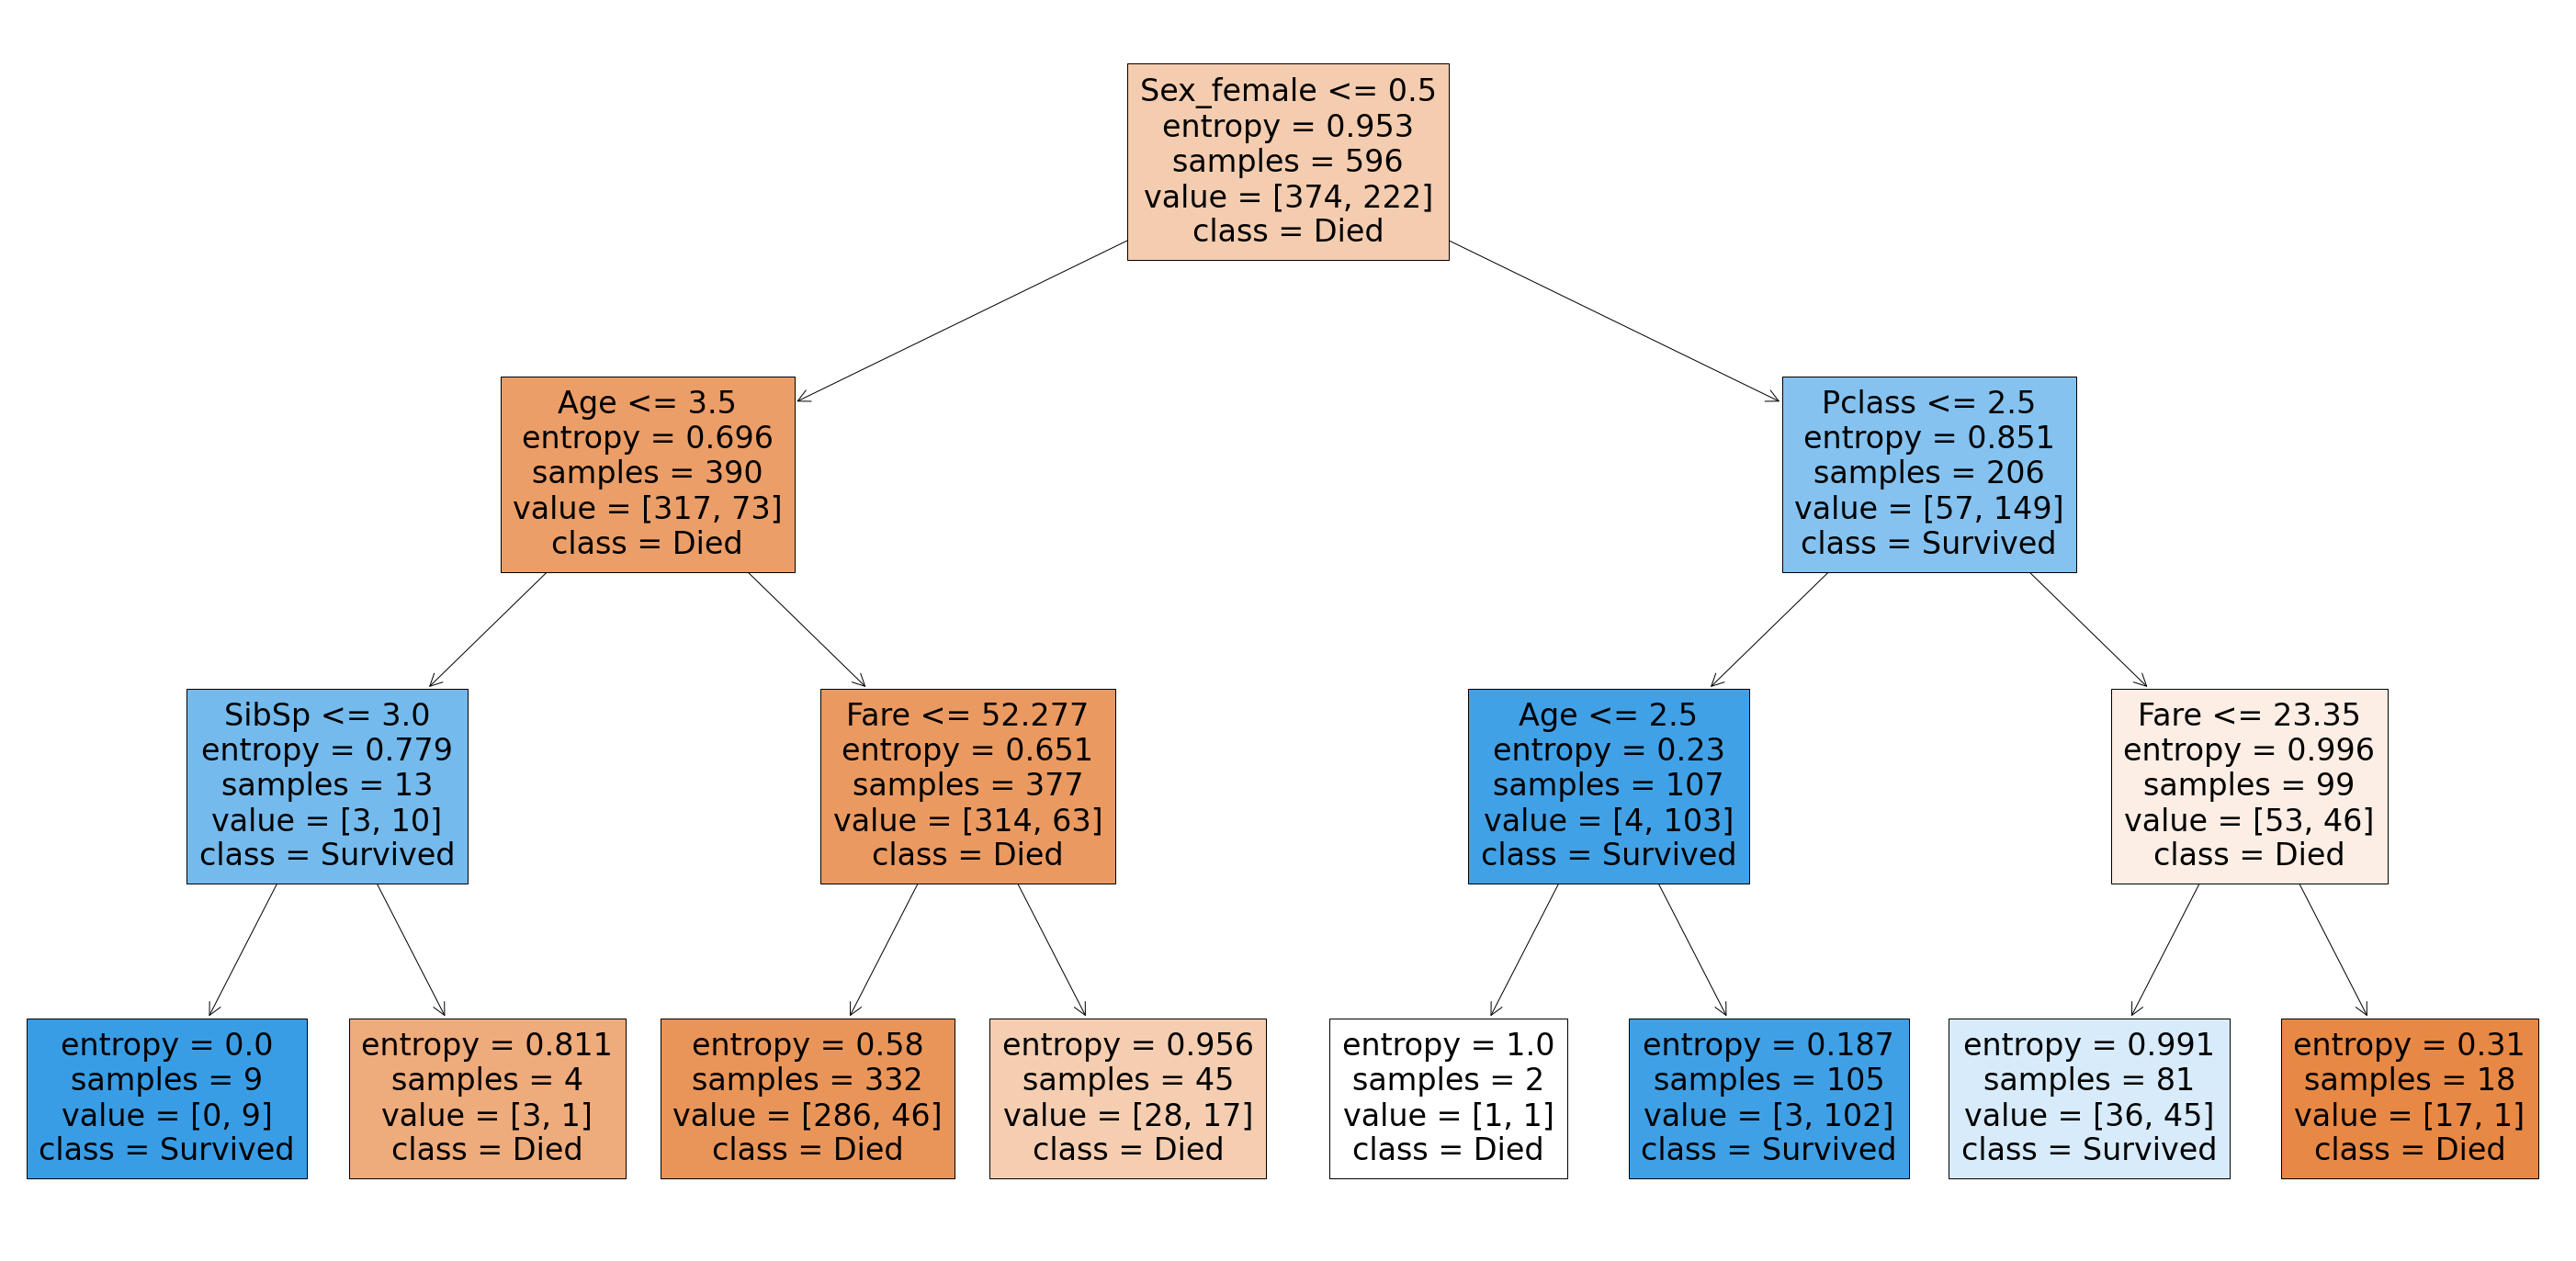

In [ ]:
plt.figure(figsize=(50,25))
tree.plot_tree(clf,feature_names=list(X_train),class_names=['Died','Survived'],filled=True)
plt.show()